In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist

2024-04-01 12:15:35.414058: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
x_train.shape

(60000, 28, 28)

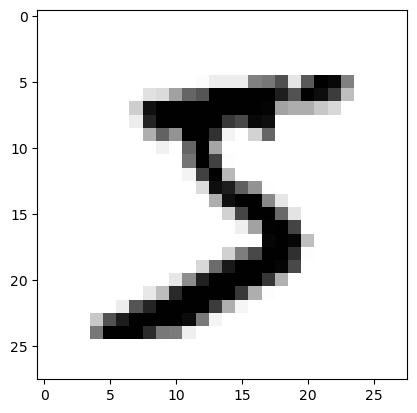

In [5]:
single_image = x_train[0]
plt.imshow(single_image, cmap="gray_r") #_r reverse the color mapping

In [12]:
y_train.shape #use caracteristcs as is, will confuse the network because it will try correlate the values (like progression valuers for example)

(60000,)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from keras.utils.np_utils import to_categorical #so always categorical as many columns need the labels
y_cat_test = to_categorical(y_test, 10) #10 because goes from zero to nine
y_cat_train = to_categorical(y_train, 10)
y_cat_train[0] #5 became 0.0.0.0.1.0.0.0.0

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
single_image.max()

255

In [16]:
#also should normilaze
x_train = x_train / x_train.max() #/ 255
x_test = x_test / x_test.max()
x_train.max()

1.0

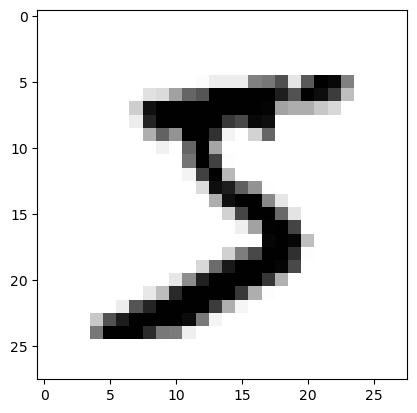

In [17]:
scaled_image = x_train[0]
plt.imshow(scaled_image, cmap="gray_r")

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(60000,28,28,1) #60000 amount of images in 28x28 pixels
x_train.shape #add color channel

(60000, 28, 28, 1)

In [20]:
x_test = x_test.reshape(10000,28,28,1) #10000 images
x_test.shape

(10000, 28, 28, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()
#convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
#flatten 2d --> 1d
model.add(Flatten())
#dense layer
model.add(Dense(128,activation="relu"))
#output layer (classifier)
model.add(Dense(10,activation="softmax"))
#build
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
#summary
model.summary()

2024-04-01 12:16:13.743946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 12:16:15.463776: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 12:16:15.467964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [23]:
#training
model.fit(x_train, y_cat_train, epochs=2, verbose=2)

Epoch 1/2


2024-04-01 12:16:25.415964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2024-04-01 12:16:27.278594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-01 12:16:28.012258: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f9948bd4cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-01 12:16:28.012280: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-04-01 12:16:28.535857: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-01 12:16:30.514361: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

1875/1875 - 11s - loss: 0.1340 - accuracy: 0.9588 - 11s/epoch - 6ms/step
Epoch 2/2
1875/1875 - 3s - loss: 0.0467 - accuracy: 0.9856 - 3s/epoch - 2ms/step


In [24]:
model.metrics_names

['loss', 'accuracy']

In [25]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0399 - accuracy: 0.9865


[0.03990485891699791, 0.9865000247955322]

In [26]:
from sklearn.metrics import classification_report

In [27]:
#predictions = model.predict_classes(x_test) #return values in normal format #not work anymore
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 0s 921us/step


array([[1.52572994e-08, 8.21250445e-09, 2.29736273e-07, ...,
        9.99999285e-01, 2.54698762e-07, 1.70320888e-07],
       [5.46080834e-08, 4.75205127e-07, 9.99999523e-01, ...,
        2.13502393e-11, 3.20547544e-09, 1.09588764e-13],
       [3.96014002e-06, 9.99679446e-01, 3.61118109e-05, ...,
        2.25820040e-04, 4.04483253e-05, 1.65962049e-07],
       ...,
       [2.20554339e-10, 1.04905482e-07, 2.52765059e-10, ...,
        3.42516660e-06, 3.46704201e-06, 9.54500138e-07],
       [3.20901279e-08, 5.62249913e-10, 6.31574584e-11, ...,
        2.66970529e-10, 7.53597706e-05, 6.74665870e-08],
       [1.05943812e-07, 7.13917725e-09, 1.43975001e-06, ...,
        1.46057645e-11, 7.88110999e-09, 7.08519632e-10]], dtype=float32)

In [28]:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))

2024-04-03 22:42:02.246831: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-04-03 22:42:04.579783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 22:42:06.250829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 22:42:06.260130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [33]:
import tensorflow as tf

In [34]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-01 12:16:57.572020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 12:16:57.573535: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 12:16:57.574869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

True